

# Red wine quality
* Database from kaggle: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?resource=download
* Dataset: One dataset related to red of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]: https://repositorium.sdum.uminho.pt/bitstream/1822/10029/1/wine5.pdf. The white wine dataset is not studied :  large dataset (with 4898 white and 1599 red entries).



# Libraries and Data preparation

In [93]:
# Python libraries
import pandas as pd
import numpy as np

# decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

# random forest
from sklearn.ensemble import RandomForestClassifier

#Kfold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#logistic regression
from sklearn.linear_model import LogisticRegression

#test split
from sklearn.model_selection import train_test_split

#Label enconding for the quality variable
from sklearn.preprocessing import LabelEncoder

#import feature selection kbest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Load the data and extract X and Y
filename = "/content/sample_data/winequality-red.csv"
data = pd.read_csv(filename)

# Data analysis

In [ ]:
data.isnull().sum()
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


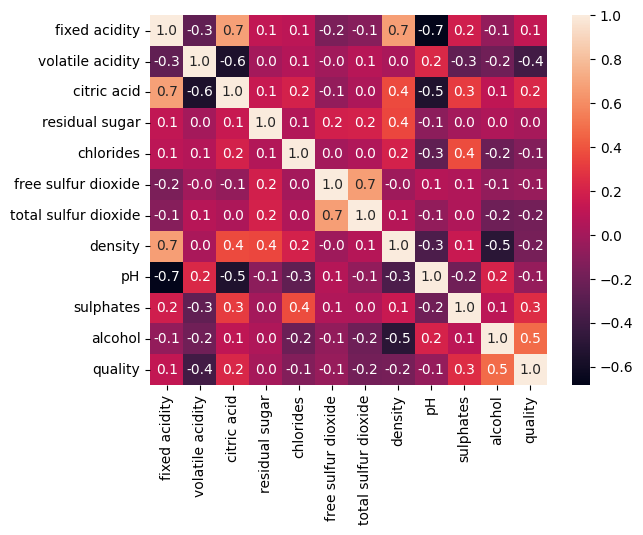

In [ ]:
# Correlation Matrix Plot
import seaborn as sns

#Correlation matrix values
correlations = data.corr()

#Prints out heatmap and table
sns.heatmap(data.corr(), annot=True, fmt=".1f") #https://seaborn.pydata.org/generated/seaborn.heatmap.html
correlations

In [ ]:
#Feature selection with supervised filtering

#Ranking top "6" correlations
n = 12
threshold = 0.5
max = 1
# Unstack and sort the absolute correlation strength
corr_rank = correlations.abs().unstack().sort_values(ascending=False)

# Correlations thresholds
corr_rank = corr_rank[corr_rank < max]
corr_rank = corr_rank[corr_rank > threshold]

# Reset the index to obtain a DataFrame
corr_rank = corr_rank.reset_index()

# Renaming column names
ranking = corr_rank.rename(columns={'level_0': 'X', 'level_1': 'Y', 0: 'Corr(X,Y)'})

#Top correlated features
print(ranking.head(n))


                       X                     Y  Corr(X,Y)
0          fixed acidity                    pH   0.682978
1                     pH         fixed acidity   0.682978
2          fixed acidity           citric acid   0.671703
3            citric acid         fixed acidity   0.671703
4          fixed acidity               density   0.668047
5                density         fixed acidity   0.668047
6   total sulfur dioxide   free sulfur dioxide   0.667666
7    free sulfur dioxide  total sulfur dioxide   0.667666
8       volatile acidity           citric acid   0.552496
9            citric acid      volatile acidity   0.552496
10                    pH           citric acid   0.541904
11           citric acid                    pH   0.541904


Ideas to improve feature selection - To delete redundant features to simplify model:
* keep pH?
* keep one type of acidity or just use pH instead, and sulfur?
* composing values (some basic chemistry knowledge needed.)

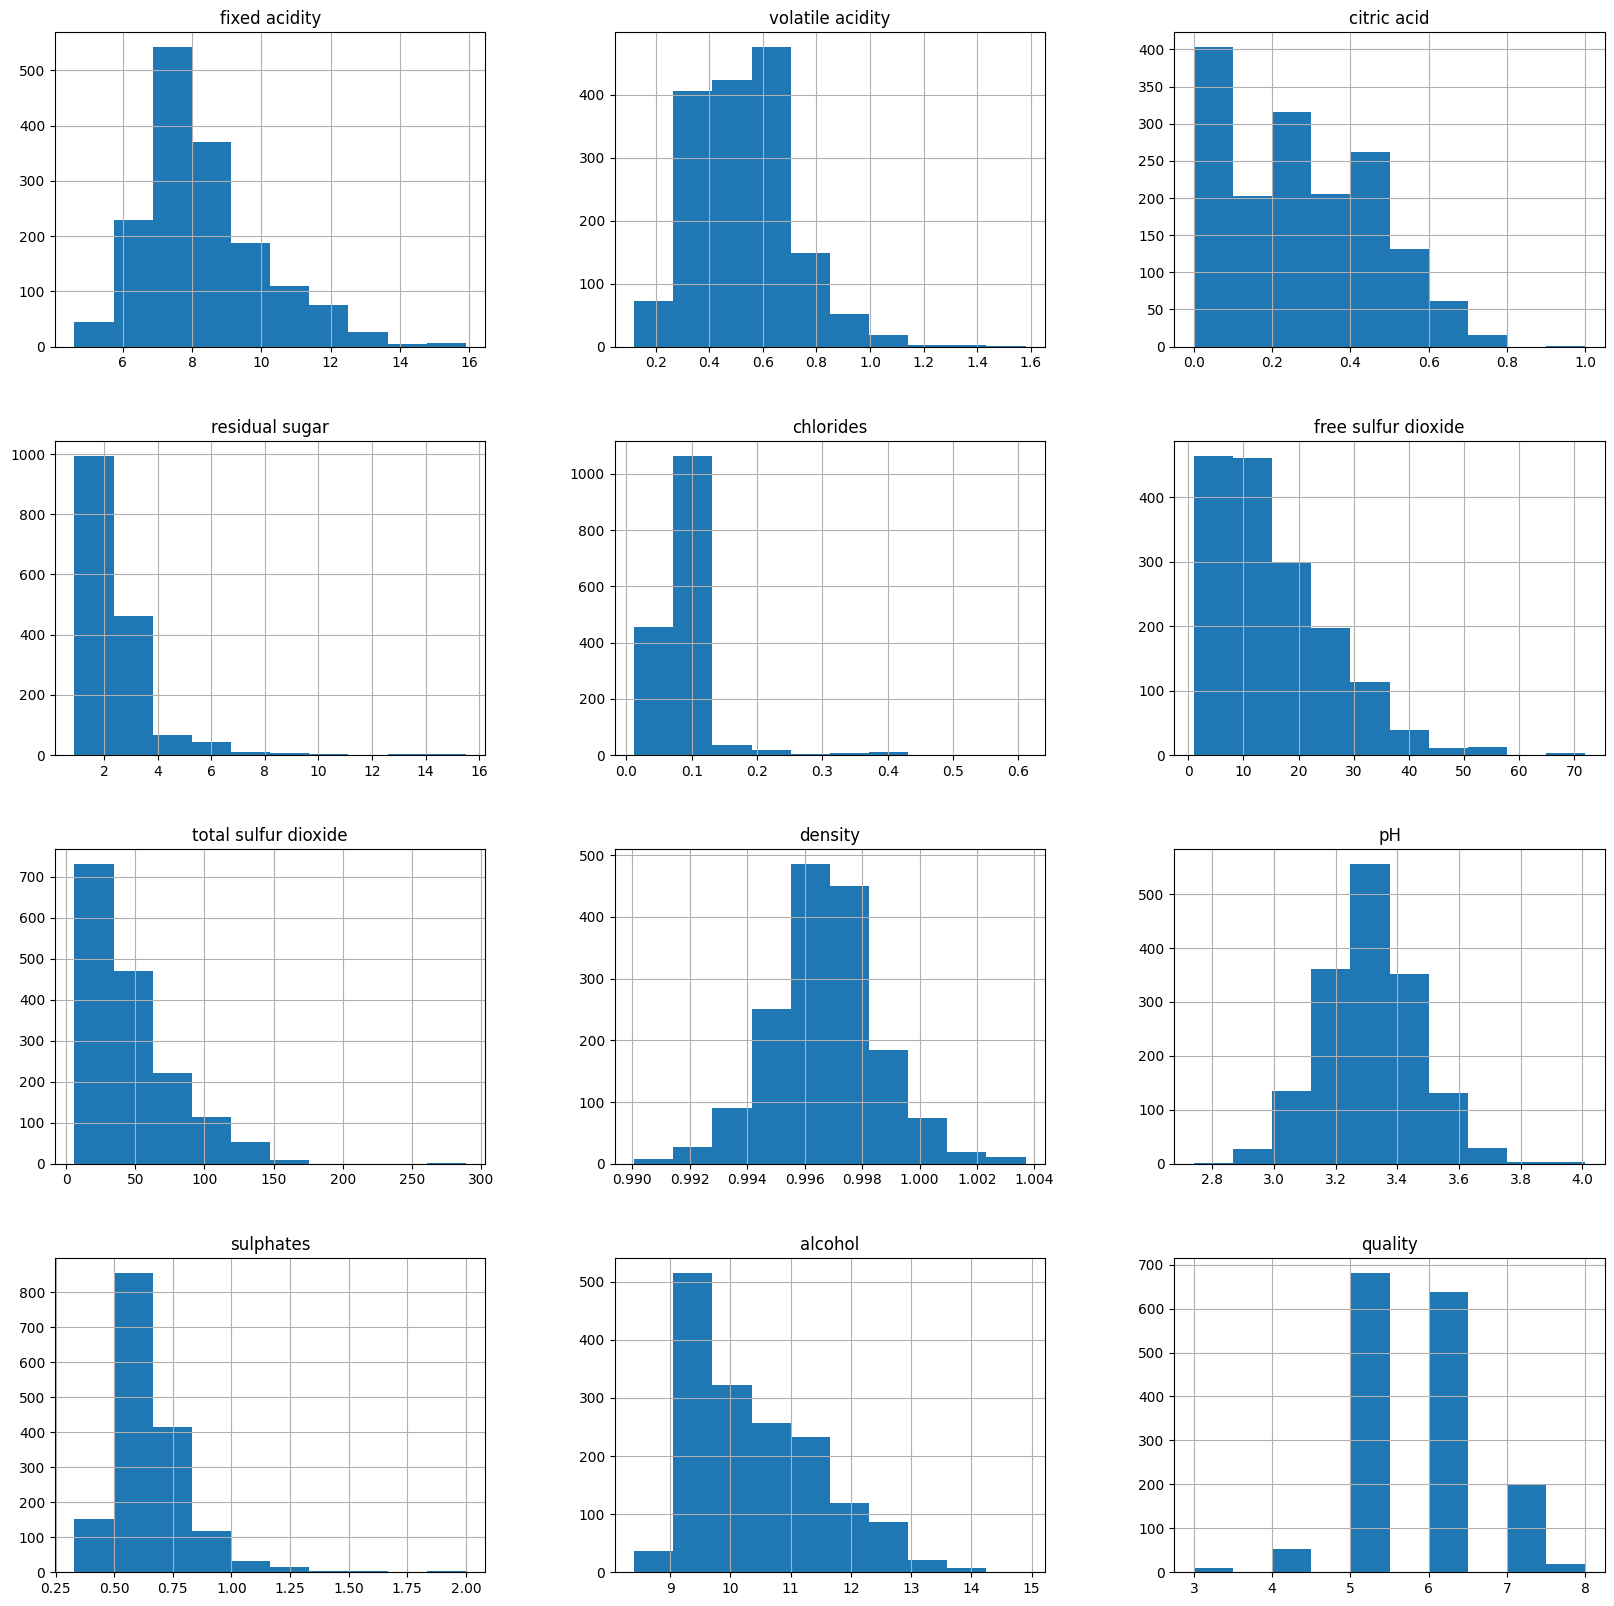

In [ ]:
# Univariate Histograms
data.hist(figsize=[20, 20])
pyplot.show()

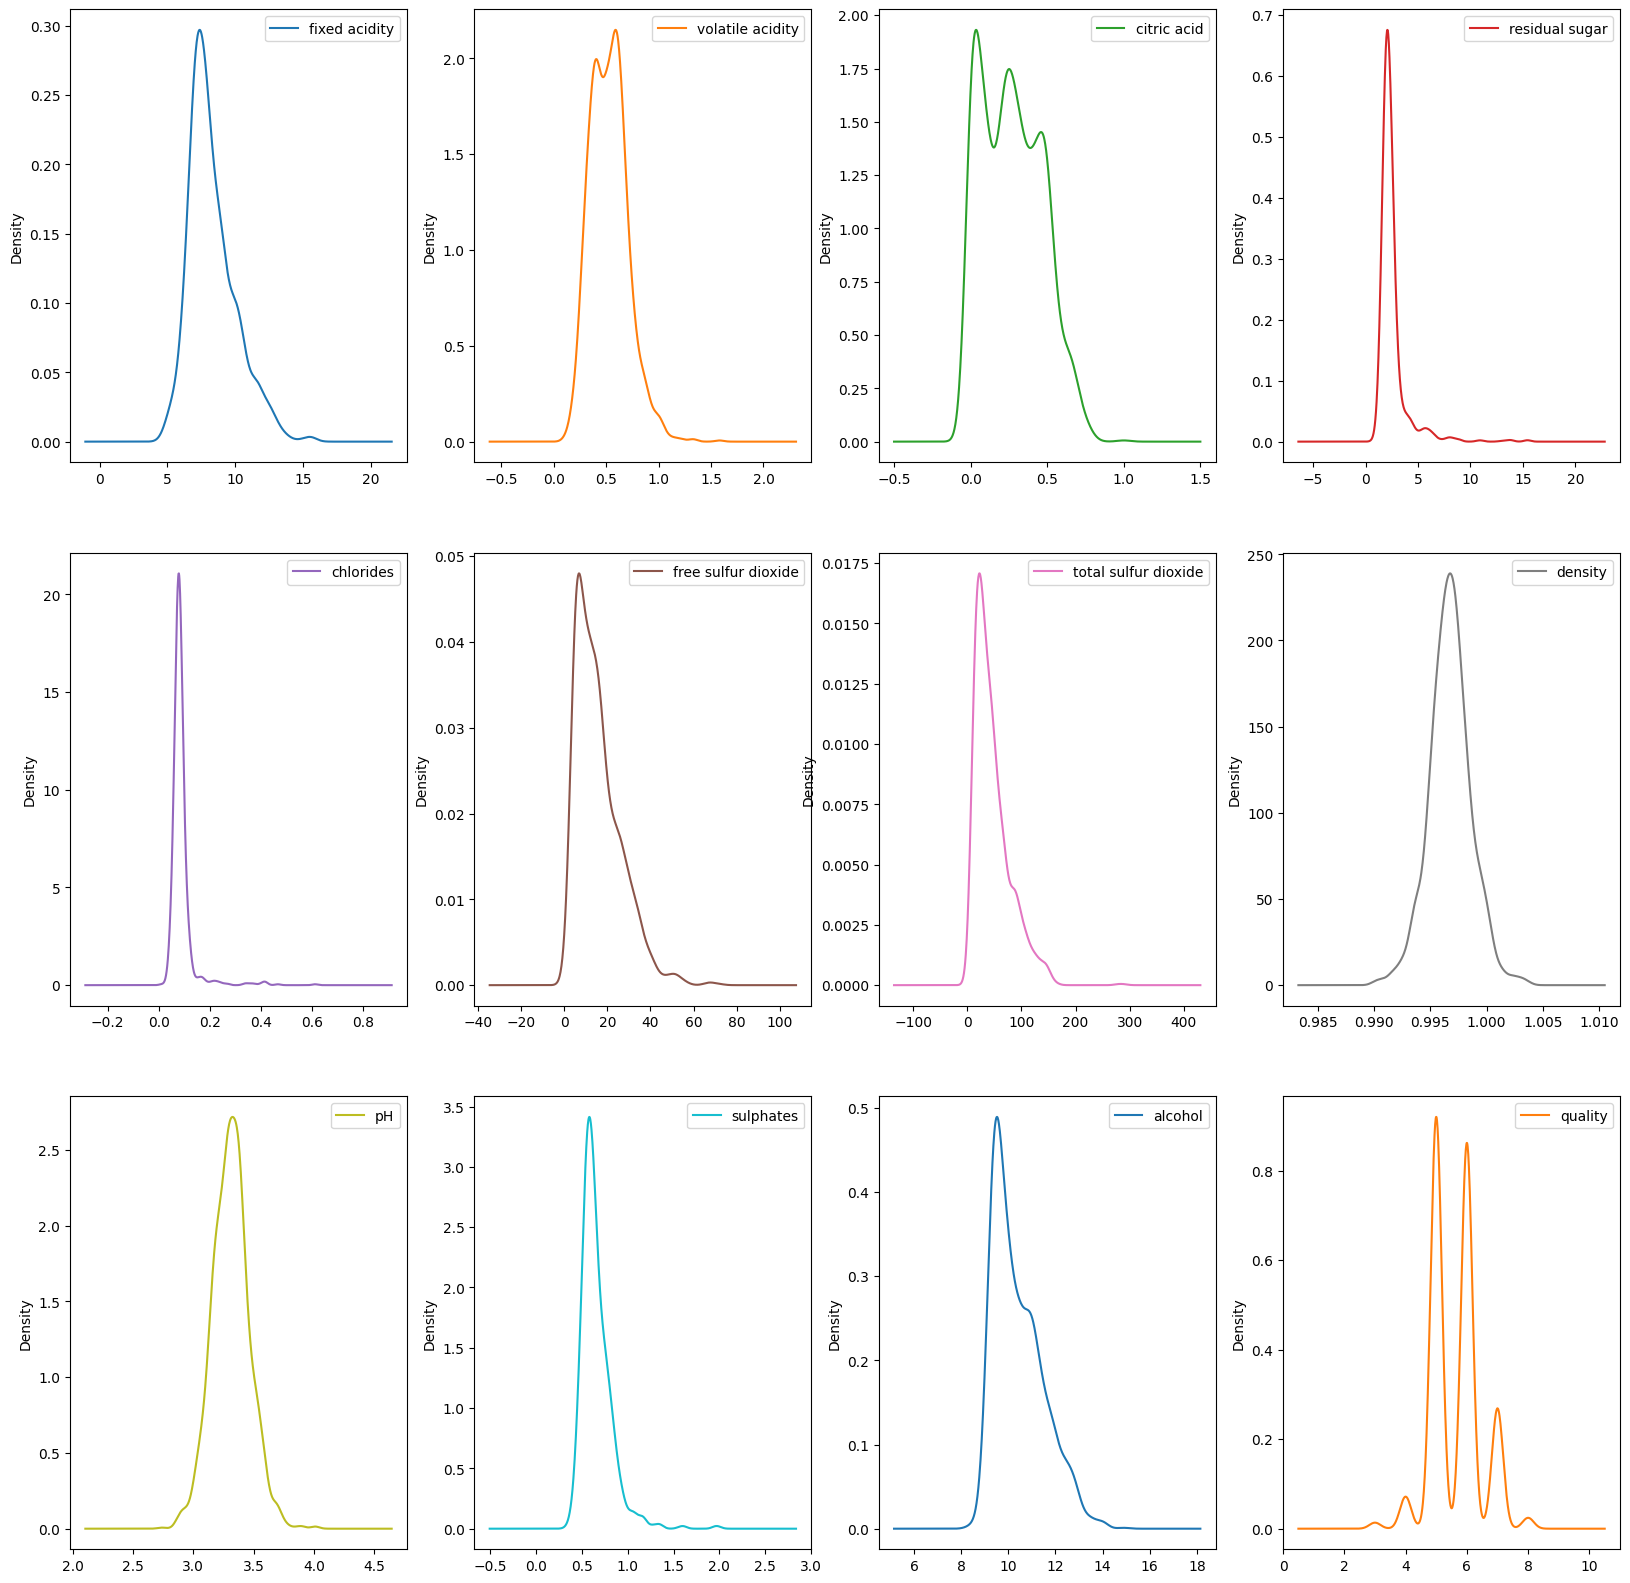

In [ ]:
# Univariate Density Plots
data.plot(kind='density', subplots=True, layout=(3,4), sharex=False, figsize=[20, 20])
pyplot.show()

Observations:
*   No empty values
*   Different scales measured -> Need for normalisation
*   Need to cleanse features, some might be redundant -> correlation matrix

Plots:
* Quality needs to be categorised to get better view of its "dimensionality", the scale seems to not provide much discriminant information beyond.


In [98]:
#Analysis based on the K-best neighbors
# Extraction of X and Y
array = data.values
X = array[:,0:11]
Y = array[:,11]

# define feature selection
fs = SelectKBest(score_func=f_regression, k=7)
# apply feature selection
X = fs.fit_transform(X, Y)
#https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

# show the headers retained and deleted
headers = data.columns[0:11]
retained_headers = headers[fs.get_support()]
deleted_headers = headers[~fs.get_support()]
print(f'Deleted headers: {list(deleted_headers)}')

Deleted headers: ['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'pH']


# Feature selection and data normalisation

In [87]:
#Data Normalisation for explanatory and target variables
from sklearn.preprocessing import MinMaxScaler

#drop of variables with high corr
data.drop(['fixed acidity', 'free sulfur dioxide', 'citric acid'], axis=1, inplace=True)
#drop of variables based on Kbest neighbors
#data.drop(['pH', 'residual sugar', 'free sulfur dioxide'], axis=1, inplace=True)

minmax = MinMaxScaler() # scaling alternatives https://www.kdnuggets.com/2023/07/data-scaling-python.html

# Define thresholds and labels for the quality variable
bins = [0, 5, 7, 10]  # Thresholds for each category (by definition 0 to 10)
labels = ['low', 'medium', 'high']

# Create a new categorical column using 'quality' scores
#https://pandas.pydata.org/docs/reference/api/pandas.cut.html
data['quality_category'] = pd.cut(data['quality'], bins=bins, labels=labels, include_lowest=True)

# Drop the original numeric 'quality' column
data.drop('quality', axis=1, inplace=True)

# Encode the categorical target variable and adding it back in the dataframe
#https://medium.com/@kattilaxman4/a-practical-guide-for-python-label-encoding-with-python-fb0b0e7079c5
label_encoder = LabelEncoder()
data['quality'] = label_encoder.fit_transform(data['quality_category'])

#Checking encoded categories
print(data['quality'].value_counts())

# Extraction of X and Y
array = data.values
X = array[:,0:8] #7 because of elimination of features
Y = array[:,8] #we put the target alone in other array

#Rescaling the data
X = minmax.fit_transform(X)

quality
2    837
1    744
0     18
Name: count, dtype: int64


# ML Modelling

In [88]:
#Training data split
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Initialise kFold
#model fit
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train) #we pass the data for training

#Model 1 : K-fold k = 10
# Logistic Regression
k = 10
kfold = KFold(n_splits = k, random_state = seed, shuffle = True)
model = LogisticRegression(solver='liblinear', C=1e2, max_iter=100)
resultsLR = cross_val_score(model, X, Y, cv=kfold)
print("%.2f" % (resultsLR.mean()))
#https://stackoverflow.com/questions/57085897/python-logistic-regression-max-iter-parameter-is-reducing-the-accuracy

# Decision Tree
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, Y_train)
resultsDT = cross_val_score(model, X, Y, cv=kfold)
print("%.2f" % (resultsDT.mean()))

# Random Forest
model = RandomForestClassifier(random_state=seed, criterion='gini', n_estimators=150)
model.fit(X_train, Y_train)
resultsRF = cross_val_score(model, X, Y, cv=kfold)
print("%.2f" % (resultsRF.mean()))

# Return mean cross validation scores for each model
# in the format [0.9, 0.9, 0.3] - rounded to two decimal places.
means = [np.round(resultsLR.mean(),2), np.round(resultsDT.mean(),2), np.round(resultsRF.mean(),2)]
print(means)

0.73
0.68
0.83
[0.73, 0.68, 0.83]


* Same results are obtained normalising explanatory variables, even they worsen if other scaling are chosen.
* For the target variable though the improvement is significant.
* For hyperpamaters, the gains are slight : 0.1% accuracy increase.
* For feature selection, the improvement goes rather for interpretability and speed, not for accuracy.

# Performance assessment

In [90]:
# import pour performance analysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# Create the confusion matrix and return the result
# Cross Validation Classification Confusion Matrix
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[  1   0   4]
 [  0 184  50]
 [  0  45 244]]


In [91]:
# Cross Validation Classification Report
from sklearn.metrics import classification_report

#classification report of the different
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

        high       1.00      0.20      0.33         5
         low       0.80      0.79      0.79       234
      medium       0.82      0.84      0.83       289

    accuracy                           0.81       528
   macro avg       0.87      0.61      0.65       528
weighted avg       0.81      0.81      0.81       528



Next steps:

*   Check if for business is a good accuracy the 81%, but check whether the high low f1 is impacted > Probably the model is just good for good / bad quality?
*   Feature selection review: it's better based on filtering rather than on kbest neighbors.

Done:
*   Study whether the different wine types influence the result and how (white vs red). Out of the scope, it requires a whole other study for another dataset since the distribution of quality varies and wine type.
*  High level review of the paper to understand the accuracies, they tend to be similar to the ones obtained.
*  Expanded descriptive analysis to determine feature selection and impact of scale.
*   Normalise dataset (done)
*   Do feature selection/analysis (done)
*   Determine if whether other models can be better
*   Categorize the quality target variable (done)
*   Finetune parameters of the models to reach better accuracy (nice to have)
*   Debug error uf undefined metric warning (done)